<a href="https://colab.research.google.com/github/ananyapoonsawat/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

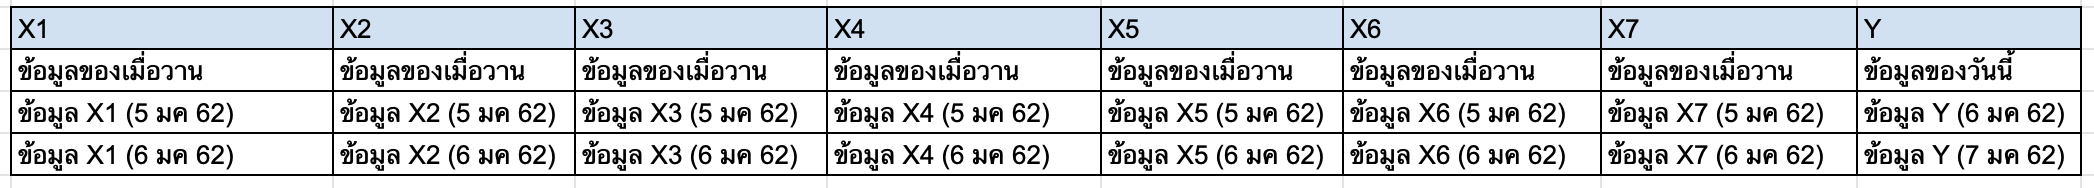

#Import library , drive

In [9]:
import numpy as np
import pandas as pd
import os
from google.colab import drive

In [10]:
drive.mount('/content/drive')

Mounted at /content/drive


#Import Data

In [31]:
#ความกด(เปอร์เซ็นต์)
AP_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
AP_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
AP_SakonNakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
AP_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
AP_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)

In [30]:
#ความชื้นสัมพัทธ์(เปอร์เซ็นต์)
RM_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความชื้นสัมพันธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
RM_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความชื้นสัมพันธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
RM_SakonNakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความชื้นสัมพันธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
RM_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความชื้นสัมพันธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
RM_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความชื้นสัมพันธ์(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)

In [28]:
#ความเร็วลม(นอต)
WV_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx",header=4)
WV_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความเร็วลม(นอต)/จ.นครพนม.xlsx",header=4)
WV_SakonNakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความเร็วลม(นอต)/จ.สกลนคร.xlsx",header=4)
WV_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความเร็วลม(นอต)/จ.หนองคาย.xlsx",header=4)
WV_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ความเร็วลม(นอต)/จ.เลย.xlsx",header=4)

In [27]:
#จำนวนเมฆ(10ส่วน)
C_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx",header=4,dtype={'Unnamed: 34':int})
C_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx",header=4,dtype={'Unnamed: 34':int})
C_SakonNakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx",header=4,dtype={'Unnamed: 34':int})
C_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx",header=4,dtype={'Unnamed: 34':int})
C_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx",header=4,dtype={'Unnamed: 34':int})

In [26]:
#ปริมาณน้ำฝน(มิลลิเมตร)
RAIN_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ปริมาณน้ำฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx",header=4)
RAIN_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ปริมาณน้ำฝน(มิลลิเมตร)/จ.นครพนม.xlsx",header=4)
RAIN_SakonNakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ปริมาณน้ำฝน(มิลลิเมตร)/จ.สกล.xlsx",header=4)
RAIN_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ปริมาณน้ำฝน(มิลลิเมตร)/จ.หนองคาย.xlsx",header=4)
RAIN_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/ปริมาณน้ำฝน(มิลลิเมตร)/จ.เลย.xlsx",header=4)

In [25]:
#อุณหภูมิจุดน้ำค้าง(เซลเซียล)
DEW_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
DEW_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
DEW_SakonNakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx",header=4)
DEW_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
DEW_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx",header=4)

In [24]:
#อุณหภูมิต่ำสุด(เซลเซียล)
L_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
L_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx",header=4)
L_SakonNakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx",header=4)
L_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
L_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx",header=4)

In [23]:
#อุณหภูมิตุ้มเเห้ง
DRY_KhonKaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
DRY_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
DRY_SakonNakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx",header=4)
DRY_NongKhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
DRY_Loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM_23/BSC_dpdm23_data/อุตุ ไฟนอล/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx",header=4)

#Cleaning Information

In [32]:
df_APlist = [AP_KhonKaen, AP_NakhonPhanom, AP_SakonNakhon, AP_NongKhai, AP_Loei]
df_RMlist = [RM_KhonKaen, RM_NakhonPhanom, RM_SakonNakhon, RM_NongKhai, RM_Loei]
df_WVlist = [WV_KhonKaen, WV_NakhonPhanom, WV_SakonNakhon, WV_NongKhai, WV_Loei]
df_Clist = [C_KhonKaen, C_NakhonPhanom, C_SakonNakhon, C_NongKhai, C_Loei]
df_RAINlist = [RAIN_KhonKaen, RAIN_NakhonPhanom, RAIN_SakonNakhon, RAIN_NongKhai, RAIN_Loei]
df_DEWlist = [DEW_KhonKaen, DEW_NakhonPhanom, DEW_SakonNakhon, DEW_NongKhai, DEW_Loei]
df_Llist = [L_KhonKaen, L_NakhonPhanom, L_SakonNakhon, L_NongKhai, L_Loei]
df_DRYlist = [DRY_KhonKaen, DRY_NakhonPhanom, DRY_SakonNakhon, DRY_NongKhai, DRY_Loei]

In [33]:
def rename_col(df):
  df.rename(columns={'Unnamed: 0': 'ลำดับ', 'Unnamed: 1': 'สถานี', 'Unnamed: 2': 'เดือน/ปี', 'Unnamed: 34': 'ค่าเฉลี่ย'}, inplace=True)
  return df

In [108]:
df_Otherlist1 = {
  "ความกดอากาศ": df_APlist,
  "ความชื้นสัมพัทธ์": df_RMlist,
  "ความเร็วลม": df_WVlist,
  "จำนวนเมฆ": df_Clist,
  "ปริมาณฝน": df_RAINlist,
  "อุณหภูมิจุดน้ำค้าง": df_DEWlist,
  "อุณหภูมิต่ำสุด": df_Llist,
  "อุณหภูมิตุ้มแห้ง": df_DRYlist
}

for category, df_list in df_Otherlist1.items():
    for df in df_list:
        rename_col(df)

#Drop Column 'สถานี'

In [40]:
def drop_column(df):

  df.drop('สถานี', axis=1, inplace = True)
  return df

In [41]:
for category, df_list in df_Otherlist1.items():
    for df in df_list:
        drop_column(df)

#Check Missing value

###Check AP

In [51]:
AP_KhonKaen.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [52]:
AP_NakhonPhanom.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [53]:
AP_SakonNakhon.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [54]:
AP_NongKhai.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [55]:
AP_Loei.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###Check RM

In [61]:
RM_KhonKaen.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [62]:
RM_NakhonPhanom.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [63]:
RM_SakonNakhon.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [64]:
RM_NongKhai.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [65]:
RM_Loei.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###Check WV

In [66]:
WV_KhonKaen.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [67]:
WV_NakhonPhanom.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [68]:
WV_SakonNakhon.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [69]:
WV_NongKhai.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [70]:
WV_Loei.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###Check C

In [71]:
C_KhonKaen.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [72]:
C_NakhonPhanom.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [73]:
C_SakonNakhon.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [74]:
C_NongKhai.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31           False
ค่าเฉลี่ย    False
dtype: bool

In [75]:
C_Loei.isnull().any()

ลำดับ          False
เดือน/ปี       False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29             False
30             False
31             False
ค่าเฉลี่ย      False
Unnamed: 35     True
Unnamed: 36     True
Unnamed: 37     True
Unnamed: 38     True
Unnamed: 39     True
Unnamed: 40     True
Unnamed: 41     True
Unnamed: 42     True
Unnamed: 43     True
Unnamed: 44     True
dtype: bool

###Check RAIN

In [76]:
RAIN_KhonKaen.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [77]:
RAIN_NakhonPhanom.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [78]:
RAIN_SakonNakhon.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [79]:
RAIN_NongKhai.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [80]:
RAIN_Loei.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31           False
ค่าเฉลี่ย    False
dtype: bool

###Check DEW

In [81]:
DEW_KhonKaen.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [82]:
DEW_NakhonPhanom.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [83]:
DEW_SakonNakhon.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [84]:
DEW_NongKhai.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [85]:
DEW_Loei.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31            True
ค่าเฉลี่ย    False
dtype: bool

###Check L

In [86]:
L_KhonKaen.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [87]:
L_NakhonPhanom.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [88]:
L_SakonNakhon.isnull().any()

ลำดับ         True
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [89]:
L_NongKhai.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [90]:
L_Loei.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###Check DRY

In [91]:
DRY_KhonKaen.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [92]:
DRY_NakhonPhanom.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [93]:
DRY_SakonNakhon.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [94]:
DRY_NongKhai.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [95]:
DRY_Loei.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

# Fix Missing value
- NaN เป็น -

In [96]:
def replace_nan(df):

  df.replace('-', np.NaN, inplace = True)
  return df

In [97]:
#ความกดอากาศ
for df in df_APlist:
  replace_nan(df)

#ความชื้นสัมพัทธ์
for df in df_RMlist:
  replace_nan(df)

#ความเร็วลม
for df in df_WVlist:
  replace_nan(df)

#จำนวนเมฆ
for df in df_Clist:
  replace_nan(df)

#ปริมาณน้ำฝน
for df in df_RAINlist:
  replace_nan(df)

# อุณหภูมิจุดน้ำค้าง
for df in df_DEWlist:
  replace_nan(df)

#อุณหภูมิต่ำสุด
for df in df_Llist:
  replace_nan(df)

#อุณหภูมิตุ้มแห้ง
for df in df_DRYlist:
  replace_nan(df)

###ปริมาณน้ำฝนมีค่าเป็น `-` และ `T`
- เกณฑ์การวัดน้ำฝนซึ่งเป็นมาตรฐานการวัด RM  สำหรับประเทศไทย คือ
* ฝนตกเล็กน้อย   มีปริมาณ 0.1 <= X <= 10 มิลลิเมตร
* ฝนตกปานกลาง  มีปริมาณ 10.1 <= X <= 35 มิลลิเมตร
* ฝนตกหนัก      มีปริมาณ 35.1 <= X <= 90 มิลลิเมตร     
* ฝนตกหนักมา    มีปริมาณ >= 90.1 มิลลิเมตร

อ้างอิง : (https://www.js100.com/en/site/post_share/view/122413)

In [98]:
# 0.09 มีค่าใกล้เคียงกับ 0.1 มากที่สุด
for df in df_RAINlist:
  df.replace('T', 0.09, inplace = True)

#เพิ่มข้อมูล จากการ Check Missing จะได้ว่า DEW and DRY มีค่าrowต่างจากข้ออื่น

###Add row > Mean
- โดยใช้ฟังก์ชั่น calculate average
- โดยใช้ฟังก์ชั่น insert average

In [112]:
def calculate_average(df):
  return df.iloc[:,2:35].mean().tolist()

In [113]:
def insert_average(df, avg_list):
  for i in range(32):
    df[i+1] = avg_list[i]

In [115]:
df_insert_other2 = {
  "RM_Loei": RM_Loei,
  "DEW_Loei": DEW_Loei,
  "DRY_Loei": DRY_Loei
}

average_other2 = {
  "DEW_Loei": calculate_average(DEW_Loei),
  "DRY_Loei": calculate_average(DRY_Loei)
}

In [116]:
for df_name, df in df_insert_other2.items():
  if df_name != "RM_Loei":
    continue

  ROWDEW = df.iloc[50:,:3]
  ROWDRY = df.iloc[50:,:3]

  insert_average(ROWDEW, average_other2["DEW_Loei"])
  insert_average(ROWDRY, average_other2["DRY_Loei"])

  ROWDEW.rename(columns={32:'ค่าเฉลี่ย'}, inplace=True)
  ROWDRY.rename(columns={32:'ค่าเฉลี่ย'}, inplace=True)

In [ ]:
df_DEWlist1 = [DEW_KhonKaen, DEW_NakhonPhanom, DEW_SakonNakhon, DEW_NongKhai, DEW_Loei]

df_DRYlist = [DRY_KhonKaen, DRY_NakhonPhanom, DRY_SakonNakhon, DRY_NongKhai, DRY_Loei]

###Row DEW
- มีจำนวน 50 แถว จาก 55 แถว

In [141]:
DEW_Loei.shape #จังหวัด loei

(60, 34)

In [102]:
DEW55 = DEW_Loei.iloc[:,2:35]

In [103]:
DEW55

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,22.6,22.4,...,21.0,21.5,21.2,21.0,21.6,21.3,21.0,20.2,20.2,21.793548
1,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,20.5,18.9,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,NaN,18.953333
2,18.0,16.6,15.0,14.6,15.3,16.7,18.9,20.2,15.5,14.0,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,13.6,13.7,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,17.9,19.3,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,NaN,NaN,17.310345
5,22.1,21.9,22.4,23.1,23.4,23.2,22.2,21.7,22.1,21.6,...,20.7,20.6,21.0,21.1,21.3,20.8,21.8,21.7,20.2,21.770968
6,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,28.1,28.4,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,NaN,26.736667
7,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,24.9,24.5,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.538710
8,13.1,15.5,16.1,15.6,15.3,15.0,15.3,16.3,17.1,14.7,...,16.6,18.3,18.4,18.7,19.4,18.0,18.4,18.0,19.2,16.041935
9,18.2,19.0,18.2,17.9,17.9,19.0,17.5,15.6,17.8,17.6,...,13.6,13.9,16.8,18.3,18.6,20.1,NaN,NaN,NaN,17.600000


In [122]:
ROWDEW

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,2021-10-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
51,49,2021-11-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
52,50,2021-12-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
53,1,2022-01-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
54,2,2022-02-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843


In [138]:
DEW_Loei55 =pd.concat([DEW_Loei,ROWDEW])

In [139]:
DEW_Loei55.tail()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,2021-10-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
51,49,2021-11-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
52,50,2021-12-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
53,1,2022-01-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
54,2,2022-02-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843


In [140]:
DEW_Loei

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,23.600,23.500,21.90,21.900,21.800,21.60,21.70,22.600,...,21.000,21.500,21.20,21.000,21.60,21.300,21.000000,20.2000,20.200000,21.793548
1,2,2011-11-01,20.100,19.500,19.50,19.100,19.500,20.50,20.60,20.800,...,18.600,17.000,16.70,17.500,18.80,19.200,19.500000,19.4000,NaN,18.953333
2,3,2011-12-01,18.000,16.600,15.00,14.600,15.300,16.70,18.90,20.200,...,16.100,12.800,9.70,9.400,11.00,14.900,16.200000,16.2000,16.500000,14.735484
3,1,2012-01-01,16.200,16.400,17.60,18.200,15.200,16.10,17.00,15.000,...,20.600,18.700,18.50,16.900,17.60,18.500,19.200000,18.2000,17.400000,16.851613
4,2,2012-02-01,17.800,18.800,20.70,19.100,19.500,18.20,16.40,16.400,...,15.000,16.300,17.10,16.700,18.70,18.600,16.900000,NaN,NaN,17.310345
5,3,2012-10-01,22.100,21.900,22.40,23.100,23.400,23.20,22.20,21.700,...,20.700,20.600,21.00,21.100,21.30,20.800,21.800000,21.7000,20.200000,21.770968
6,4,2012-11-01,26.100,25.300,26.20,26.200,26.900,27.30,27.80,27.900,...,27.400,25.800,26.30,26.600,25.60,25.200,25.800000,26.7000,NaN,26.736667
7,5,2012-12-01,27.600,27.600,25.80,26.600,26.400,25.40,24.90,25.300,...,24.600,21.400,21.40,23.000,24.60,24.400,24.600000,24.4000,20.300000,24.538710
8,6,2013-01-01,13.100,15.500,16.10,15.600,15.300,15.00,15.30,16.300,...,16.600,18.300,18.40,18.700,19.40,18.000,18.400000,18.0000,19.200000,16.041935
9,7,2013-02-01,18.200,19.000,18.20,17.900,17.900,19.00,17.50,15.600,...,13.600,13.900,16.80,18.300,18.60,20.100,NaN,NaN,NaN,17.600000


###Row DRY
- มีจำนวน 50 แถว จาก 55 แถว

In [117]:
DRY_Loei.shape #จังหวัด loei

(50, 34)

In [118]:
DRY55 = DRY_Loei.iloc[:,2:35]

In [119]:
DRY55

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,26.3,25.1,24.4,25.2,25.6,23.7,24.6,26.2,26.0,27.1,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,25.3,24.7,24.5,24.4,24.9,25.4,25.8,26.3,24.5,22.5,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,NaN,24.4
2,23.9,22.9,21.0,20.9,22.3,21.6,23.8,26.0,24.3,21.7,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,22.7,22.9,24.1,24.3,23.3,23.0,22.2,21.3,20.9,20.7,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,23.4,24.2,23.2,24.0,25.6,26.3,25.9,25.4,25.2,26.5,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,NaN,NaN,25.4
5,26.4,26.9,25.3,25.9,26.6,26.3,26.3,24.7,26.3,26.7,...,26.9,26.4,27.2,26.8,27.4,27.4,27.9,27.9,27.4,26.8
6,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,28.1,28.4,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,NaN,26.7
7,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,24.9,24.5,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.5
8,19.5,22.2,23.8,23.2,22.2,21.6,21.8,22.8,24.0,22.8,...,24.4,25.3,24.6,25.0,23.1,22.0,23.6,24.0,21.5,22.9
9,22.3,23.4,23.8,25.9,25.9,26.9,27.4,26.5,25.9,26.7,...,25.2,24.7,26.1,28.4,29.6,29.0,NaN,NaN,NaN,26.4


In [120]:
ROWDRY

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,2021-10-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
51,49,2021-11-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
52,50,2021-12-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
53,1,2022-01-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
54,2,2022-02-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246


In [123]:
DRY_Loei =pd.concat([DRY_Loei,ROWDRY])

In [126]:
DRY_Loei.tail()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,2021-10-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
51,49,2021-11-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
52,50,2021-12-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
53,1,2022-01-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
54,2,2022-02-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246


###Cut columns
- จาก Column C_Loei ที่มี[16, 35]

In [127]:
CutC_Loei = C_Loei.drop(columns=['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41'
,'Unnamed: 42','Unnamed: 43','Unnamed: 44'])

### Add mean in Missing Value

In [128]:
APMeanM = []
RMMeanM = []
WVMeanM = []
CMeanM = []
RAINMeanM = []
DEWMeanM = []
LMeanM = []
DRYMeanM = []


for category, df_list in zip([
     "AP", "RM", "WV", "C", "RAIN","DEW", "L", "DRY"],
     [df_APlist, df_RMlist, df_WVlist, df_Clist, df_RAINlist,
      df_DEWlist, df_Llist, df_DRYlist]):

  for df in df_list:
    missing_values = df.isnull().any()
    if missing_values.any():
      if category == "Air Pressure":
        APMeanM.append(missing_values.idxmax())
      elif category == "Relative Humidity":
        RMMeanM.append(missing_values.idxmax())
      elif category == "Wind Speed":
        WVMeanM.append(missing_values.idxmax())
      elif category == "Number of Clouds":
        CMeanM.append(missing_values.idxmax())
      elif category == "Rainfall":
        RAINMeanM.append(missing_values.idxmax())
      elif category == "Dew Point":
        DEWMeanM.append(missing_values.idxmax())
      elif category == "Minimum Degree":
        LMeanM.append(missing_values.idxmax())
      elif category == "Dry Bulb":
        DRYMeanM.append(missing_values.idxmax())

# Print results
print("Air Pressure: Missing values in columns:", APMeanM)
print("Relative Humidity: Missing values in columns:", RMMeanM)
print("Wind Speed: Missing values in columns:", WVMeanM)
print("Number of Clouds: Missing values in columns:", CMeanM)
print("Rainfall: Missing values in columns:", RAINMeanM)
print("Dew Point: Missing values in columns:", DEWMeanM)
print("Minimum Degree: Missing values in columns:", LMeanM)
print("Dry Bulb: Missing values in columns:", DRYMeanM)

Air Pressure: Missing values in columns: []
Relative Humidity: Missing values in columns: []
Wind Speed: Missing values in columns: []
Number of Clouds: Missing values in columns: []
Rainfall: Missing values in columns: []
Dew Point: Missing values in columns: []
Minimum Degree: Missing values in columns: []
Dry Bulb: Missing values in columns: []


In [129]:
L_SakonNakhon.tail()

L_SakonNakhon.iloc[53, 0] = '1'

L_SakonNakhon.tail()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,2021-10-01,26.1,25.0,24.1,23.3,24.0,24.1,23.5,24.5,...,19.9,19.6,19.5,19.5,20.5,23.0,22.9,23.4,22.9,23.0
51,49,2021-11-01,23.3,23.0,22.1,20.0,22.8,22.6,23.5,22.4,...,19.6,17.5,17.6,16.9,17.1,16.0,17.3,17.4,NaN,20.1
52,50,2021-12-01,16.3,15.3,13.4,11.5,11.5,14.1,12.7,13.9,...,16.8,18.1,19.6,19.8,18.4,15.8,16.6,17.0,NaN,16.3
53,1,2022-01-01,15.5,16.0,16.0,18.2,16.0,17.7,17.2,17.5,...,20.2,17.9,20.1,21.9,19.9,20.3,19.6,22.0,19.6,18.2
54,2,2022-02-01,17.4,17.7,17.8,17.0,16.4,15.7,18.5,20.0,...,13.0,12.0,12.3,14.0,16.1,NaN,NaN,NaN,NaN,17.0


In [131]:
Summary8 = [df_APlist, df_RMlist, df_WVlist, df_Clist, df_RAINlist, df_DEWlist, df_Llist, df_DRYlist]

In [133]:
Summary8

[[   ลำดับ   เดือน/ปี        1        2        3        4        5        6  \
  0    1   2011-10-01  1005.47  1006.65  1007.49  1008.28  1009.88  1011.36   
  1    2   2011-11-01  1011.79  1010.83  1010.74  1010.71  1010.09  1009.24   
  2    3   2011-12-01  1011.43  1012.57  1012.28  1012.97  1013.09  1012.03   
  3    1   2012-01-01  1015.67  1014.11  1012.91  1014.06  1015.51  1015.88   
  4    2   2012-02-01  1013.26  1012.92  1013.61  1013.18  1011.26  1008.80   
  5    3   2012-10-01  1011.50  1011.11  1008.60  1007.07  1008.17  1010.06   
  6    4   2012-11-01  1012.67  1011.17  1010.47  1010.24  1010.43  1010.90   
  7    5   2012-12-01  1009.80  1010.17  1010.74  1010.72  1010.61  1012.15   
  8    6   2013-01-01  1014.58  1013.30  1013.73  1012.89  1011.43  1011.80   
  9    7   2013-02-01  1015.19  1013.97  1013.89  1013.91  1013.43  1011.11   
  10   8   2013-10-01  1007.15  1010.12  1009.88  1009.47  1008.08  1008.35   
  11   9   2013-11-01  1011.98  1011.46  1012.38  10

In [ ]:
finish = Finish_data.sort_values("Date",ascending=False) #วันล่าสุดอยู่ข้างบน ข้อมูลปริมาณน้ำฝนรวม5จังหวัด
finish